In [1]:
from util import *
from calc import *
from dask.distributed import wait

client=get_rmm_client()

root_path='/home/yuninze/res'
data_name='uiop.zarr'

storage=init_zarr(root_path=root_path, data_name=data_name)

In [3]:
expr=to_darr(storage.expr).map_blocks(cp.asarray)
_=wait(expr.persist())
expr

dask.array<asarray, shape=(120, 37637567), dtype=int8, chunksize=(20, 5880870), chunktype=cupy.ndarray>

In [5]:
expr_var_ind=da.var(expr, axis=0) != 0
expr_var=expr[:, expr_var_ind]

In [6]:
expr_var=expr_var.map_blocks(cp.asnumpy)
_=wait(expr_var.persist())

In [15]:
write_array(storage,('/result/expr_var', expr_var.map_blocks(cp.asnumpy).compute()))

ㅡㅡㅡㅡㅡ Created name='/result/expr_var' of (120, 14423331), int8 


[('/result/expr_var', (120, 14423331))]

In [2]:
expr_var=to_darr(storage.result.expr_var)
expr_var

dask.array<array, shape=(120, 14423331), dtype=int8, chunksize=(24, 5408754), chunktype=numpy.ndarray>

In [4]:
result_svd=get_svd(expr_var, n=40, backend='dask')[2].compute()
result_svd.shape

2025-01-08 19:39:15,377 - distributed.worker.memory - WARNING - gc.collect() took 1.004s. This is usually a sign that some tasks handle too many Python objects at the same time. Rechunking the work into smaller tasks might help.
2025-01-08 19:39:15,401 - distributed.worker.memory - WARNING - Worker is at 86% memory usage. Pausing worker.  Process memory: 26.89 GiB -- Worker memory limit: 31.11 GiB
2025-01-08 19:39:59,481 - distributed.worker.memory - WARNING - Worker is at 73% memory usage. Resuming worker. Process memory: 22.98 GiB -- Worker memory limit: 31.11 GiB
2025-01-08 19:42:50,349 - distributed.worker.memory - WARNING - Worker is at 87% memory usage. Pausing worker.  Process memory: 27.20 GiB -- Worker memory limit: 31.11 GiB
2025-01-08 19:43:14,723 - distributed.worker.memory - WARNING - Worker is at 79% memory usage. Resuming worker. Process memory: 24.88 GiB -- Worker memory limit: 31.11 GiB


(40, 14423331)

In [5]:
write_array(storage,('/result/expr_var_compressed',result_svd))

ㅡㅡㅡㅡㅡ Created name='/result/expr_var_compressed' of (40, 14423331), float64 


[('/result/expr_var_compressed', (40, 14423331))]

In [2]:
expr_var_compressed=to_darr(storage['/result/expr_var_compressed'],thin=True)

In [3]:
result_pca=lap(pca, darr=expr_var_compressed, batch_size=512)
result_pca_coord=result_pca[1].compute()

/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 110.05 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 233.86 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2025-01-08 21:44:29,485 - distributed.worker.memory - WARNING - Worker is at 85% memory usage. Pausing worker.  Process memory: 26.70 GiB -- Worker memory limit: 31.11 GiB
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
2025-01-08 21:45:40,302 - distributed.worker.memory - WARNING - Worker is at 67% memory usage. Resuming worker. Process memory: 21.00 GiB -- Worker

ㅡㅡㅡㅡㅡ <function pca at 0x7479ab39a3b0> Took 484.0 s


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 330.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [4]:
write_array(storage,('/result/result_pca_coord', result_pca_coord))

ㅡㅡㅡㅡㅡ Created name='/result/result_pca_coord' of (40, 2), float64 


[('/result/result_pca_coord', (40, 2))]

ㅡㅡㅡㅡㅡ Attempting to cluster (40, 14423331), float64, 4401MB for cluster_count=2, component_count=10


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/dask/base.py:1402: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


ㅡㅡㅡㅡㅡ Clustring took 12.0 s 
ㅡㅡㅡㅡㅡ Scoring took 21.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (40, 14423331), float64, 4401MB for cluster_count=4, component_count=10


Found fewer than 4 clusters in init (found 3).


ㅡㅡㅡㅡㅡ Clustring took 7.0 s 
ㅡㅡㅡㅡㅡ Scoring took 15.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (40, 14423331), float64, 4401MB for cluster_count=6, component_count=10


Found fewer than 6 clusters in init (found 5).


ㅡㅡㅡㅡㅡ Clustring took 6.0 s 
ㅡㅡㅡㅡㅡ Scoring took 15.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (40, 14423331), float64, 4401MB for cluster_count=8, component_count=10


Found fewer than 8 clusters in init (found 3).


ㅡㅡㅡㅡㅡ Clustring took 7.0 s 
ㅡㅡㅡㅡㅡ Scoring took 38.0 s 
ㅡㅡㅡㅡㅡ Attempting to cluster (40, 14423331), float64, 4401MB for cluster_count=10, component_count=10


Found fewer than 10 clusters in init (found 4).


ㅡㅡㅡㅡㅡ Clustring took 7.0 s 
ㅡㅡㅡㅡㅡ Scoring took 49.0 s 


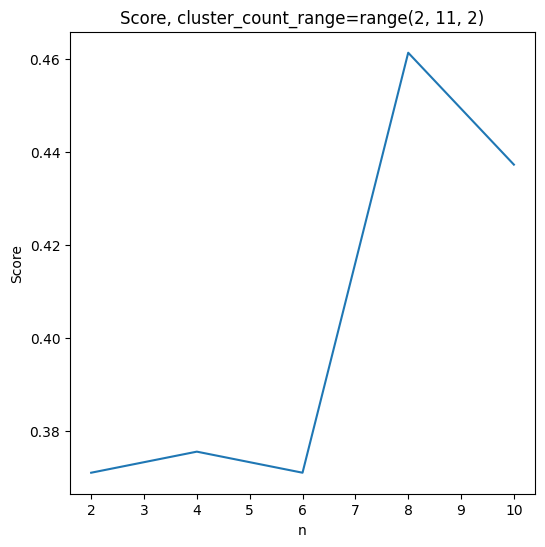

In [6]:
result_cluster=cluster_nx_iter(
  darr=expr_var_compressed,
  cluster_count_range=range(2,11,2),
  scoring=True,
  component_count=10
)

(<Figure size 800x800 with 1 Axes>, <Axes: xlabel='Xr: X0', ylabel='Xr: X1'>)

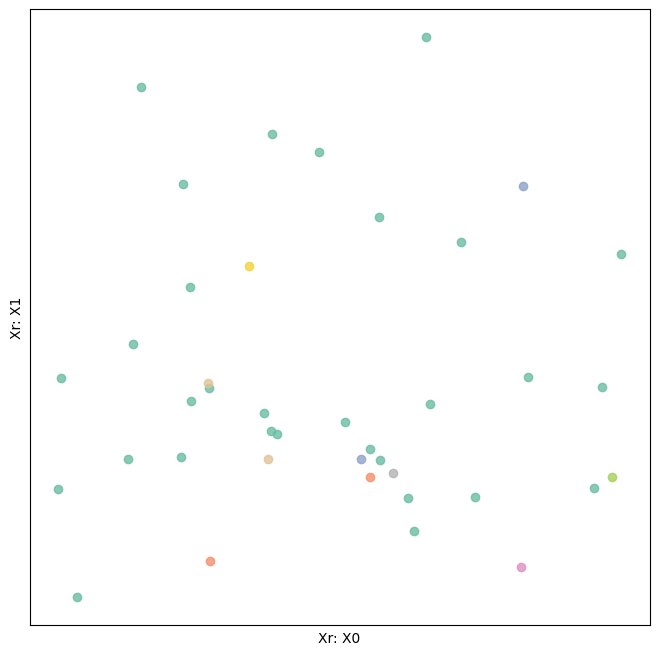

In [22]:
cluster_plot(result_pca_coord, result_cluster[0][8][1].labels_)

In [ ]:
expr_var_compressed_cp=cp.asarray(expr_var_compressed, dtype='f4')

ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:02:35.822543] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:02:39.061968] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:02:41.765754] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:02:44.644921] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:02:48.098785] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [23:02:51.116836] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:02:53.797239] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:02:56.778128] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:02:59.804228] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:03:02.652231] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:03:05.616810] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [23:03:08.541957] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:03:11.375027] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [23:03:14.517713] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:03:17.862087] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [23:03:20.699551] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:03:23.730716] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [23:03:27.109997] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:03:30.107483] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:03:33.068097] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:03:35.870480] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)
/home/yuninze/code/bicpy/bicpy/calc.py:241: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(figsize=figsize)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [23:03:38.644140] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:03:41.391926] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:03:44.393519] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [23:03:47.392573] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:03:50.318992] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:03:53.793308] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:03:56.931288] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:03:59.999372] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:04:02.741712] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:04:05.534760] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:04:08.295295] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [23:04:11.127773] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:04:13.969454] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [23:04:17.175097] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:04:20.319562] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:04:23.526397] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:04:26.669264] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [23:04:29.369664] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:04:32.335714] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [23:04:35.053141] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:04:37.757164] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:04:40.808649] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:04:43.760610] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:04:46.668574] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [23:04:49.435920] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 150, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [23:04:52.293912] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 150 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:04:55.345958] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:04:58.443190] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 1000.0}) 
[W] [23:05:01.337681] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:05:04.314664] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 10000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:05:07.386070] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [23:05:10.172332] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:05:12.962424] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:05:15.972132] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:05:19.319983] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:05:22.130611] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:05:24.959157] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 1000000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:05:27.863171] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:05:30.902014] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:05:34.114668] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:05:37.470993] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:05:40.313617] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:05:43.044313] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:05:45.889504] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 1000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:05:49.174267] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 550, 'n_neighbors': 100000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:05:52.241307] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 550 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 1000, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:05:55.347459] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 1000 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:05:58.788327] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:06:02.229759] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [23:06:05.333687] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 10000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:06:08.301118] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:06:10.997240] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:06:13.875489] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:06:16.699250] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 250, 'n_neighbors': 10000000, 'n_iter': 10000, 'learning_rate': 31.622776601683793}) 
[W] [23:06:19.849381] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 250 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:06:23.022603] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 10000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:06:26.144575] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:06:29.588177] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:06:32.937866] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 50, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:06:36.039505] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 50 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:06:39.050440] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 750, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:06:41.842523] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 750 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 300, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 74.98942093324558}) 
[W] [23:06:44.617235] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 300 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 700, 'n_neighbors': 100000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [23:06:47.514817] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 700 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 177.82794100389228}) 
[W] [23:06:50.255706] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 500, 'n_neighbors': 100000, 'n_iter': 1000, 'learning_rate': 74.98942093324558}) 
[W] [23:06:53.282450] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 500 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 600, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 1000.0}) 
[W] [23:06:56.676566] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 600 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 1000000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:06:59.436269] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 650, 'n_neighbors': 1000000000, 'n_iter': 100, 'learning_rate': 421.6965034285823}) 
[W] [23:07:02.488506] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 650 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 800, 'n_neighbors': 100000000, 'n_iter': 1000, 'learning_rate': 177.82794100389228}) 
[W] [23:07:05.419609] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 800 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 450, 'n_neighbors': 1000000000, 'n_iter': 1000, 'learning_rate': 1000.0}) 
[W] [23:07:08.523434] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 450 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 900, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 31.622776601683793}) 
[W] [23:07:11.346240] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 900 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 850, 'n_neighbors': 100000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:07:14.507613] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 850 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 10000000, 'n_iter': 1000, 'learning_rate': 421.6965034285823}) 
[W] [23:07:17.417751] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 100, 'n_neighbors': 1000000, 'n_iter': 100, 'learning_rate': 177.82794100389228}) 
[W] [23:07:20.252533] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 100 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 400, 'n_neighbors': 100000000, 'n_iter': 100, 'learning_rate': 31.622776601683793}) 
[W] [23:07:23.030239] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 400 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 950, 'n_neighbors': 1000000000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [23:07:26.520096] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 950 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 200, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 421.6965034285823}) 
[W] [23:07:29.930074] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 200 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


ㅡㅡㅡㅡㅡ Fitting for (_param={'perplexity': 350, 'n_neighbors': 10000, 'n_iter': 10000, 'learning_rate': 74.98942093324558}) 
[W] [23:07:33.078126] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: n_neighbors = {} should be less than 1024
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:344: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)
/home/yuninze/conda/envs/origin/lib/python3.10/site-packages/cuml/internals/api_decorators.py:188: UserWarning: Perplexity = 350 should be less than the # of datapoints = 40.
  ret = func(*args, **kwargs)


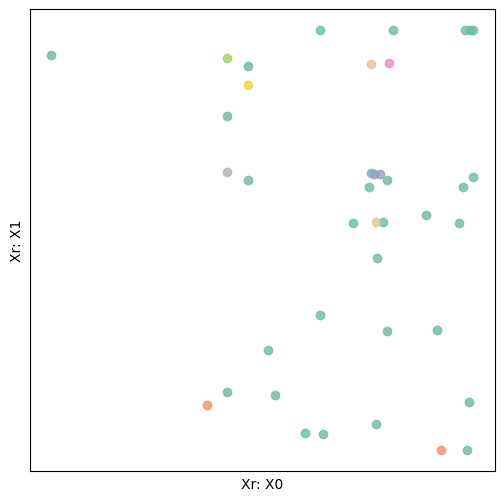

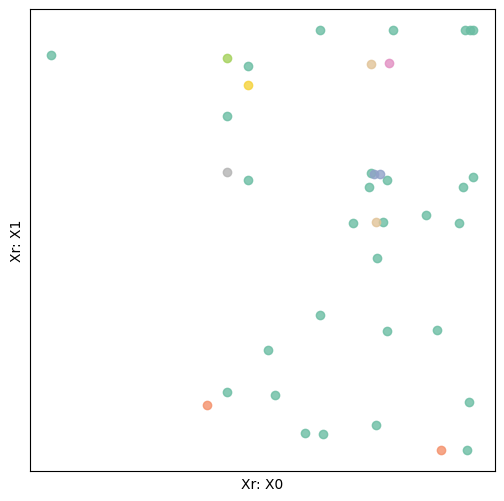

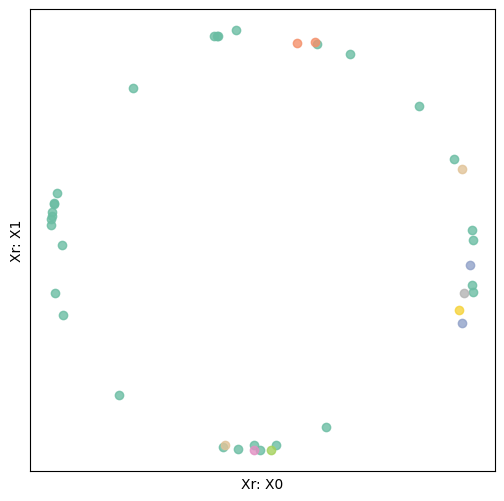

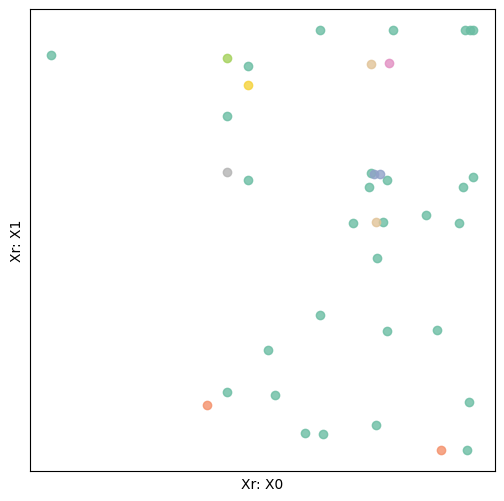

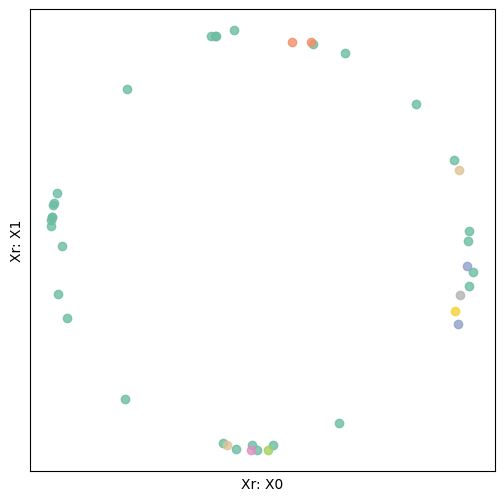

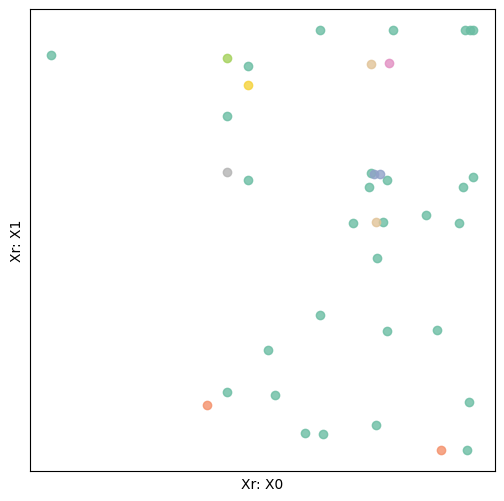

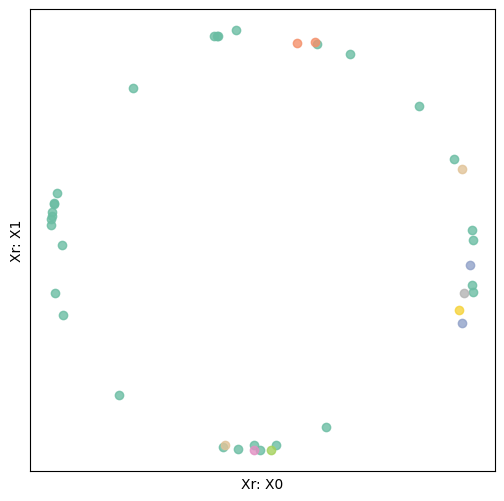

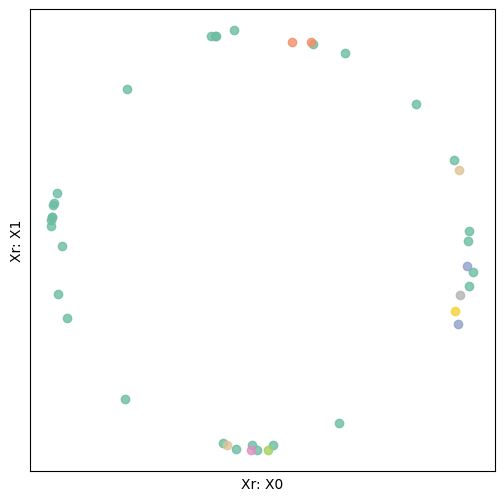

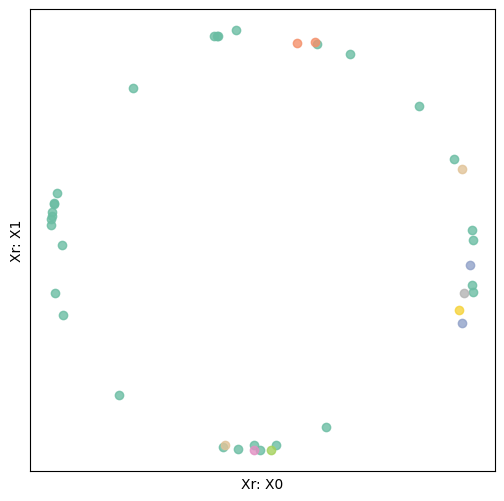

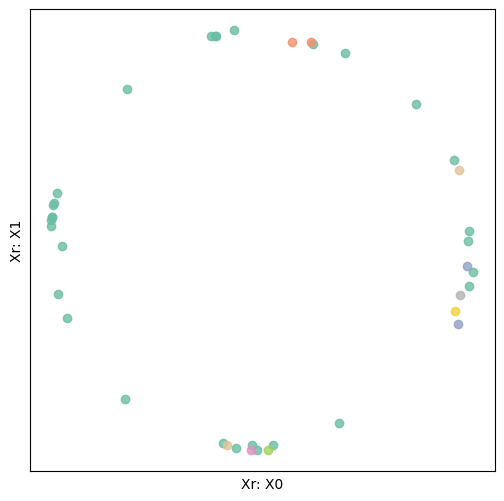

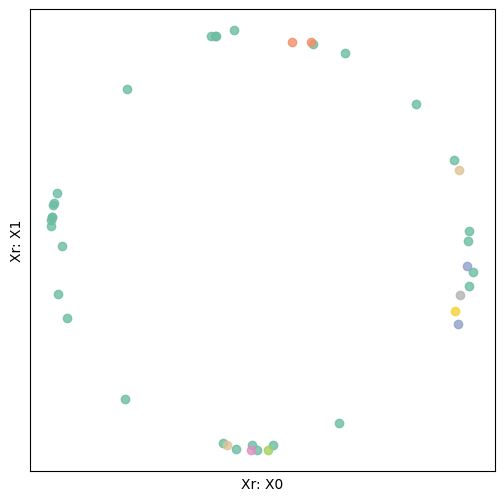

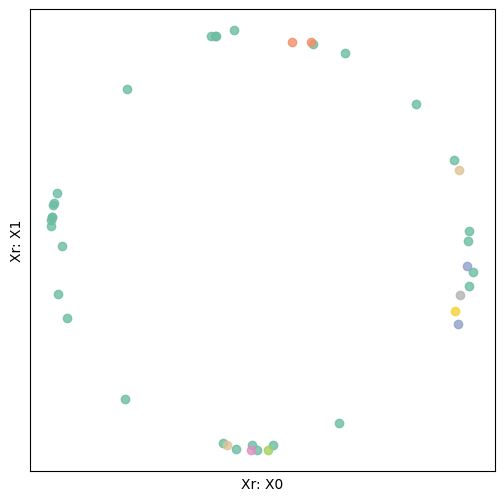

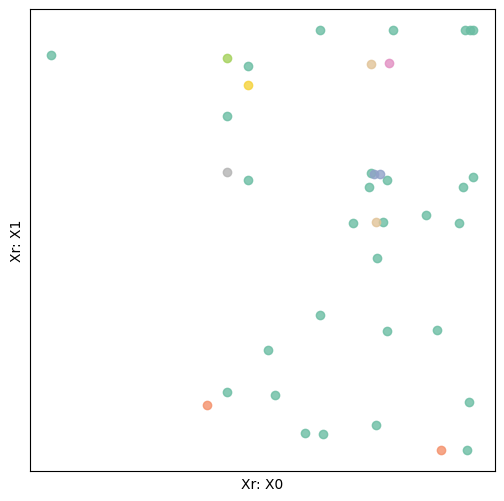

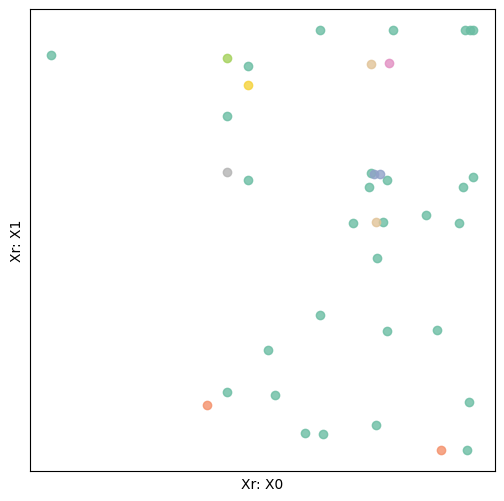

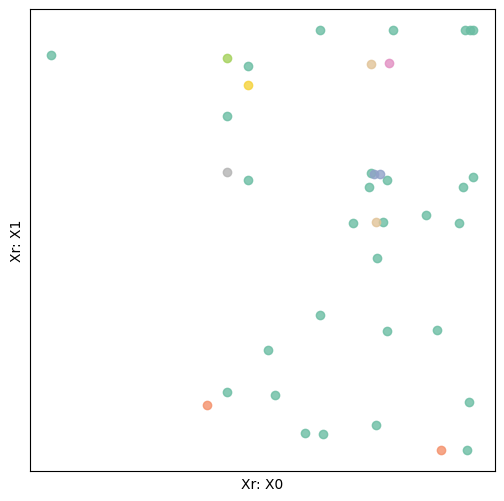

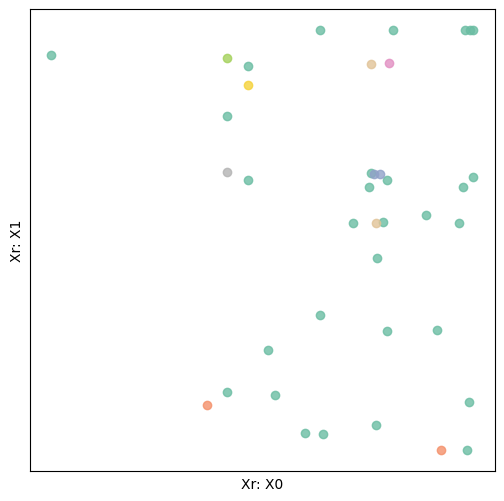

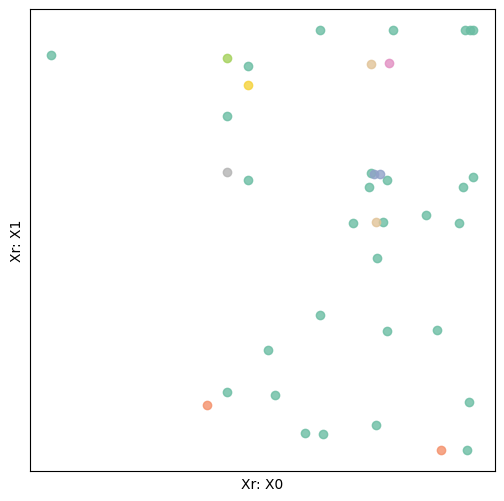

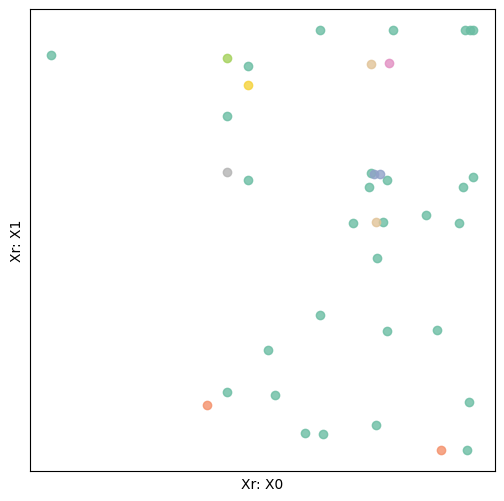

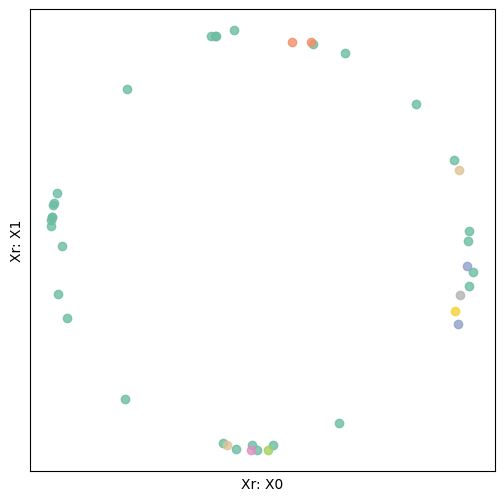

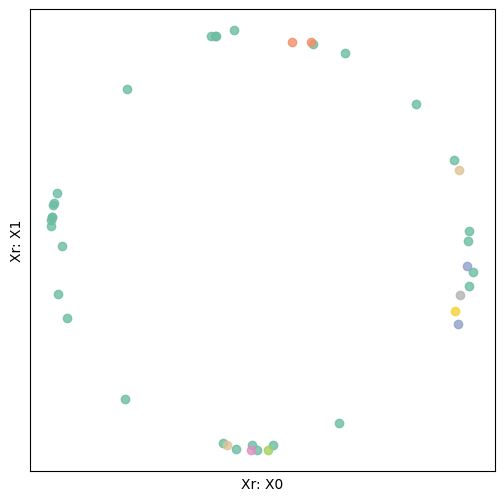

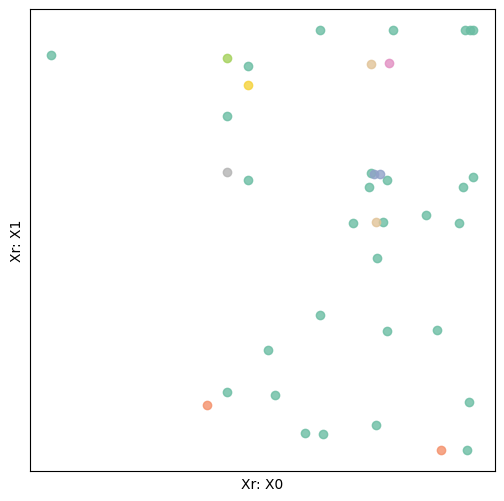

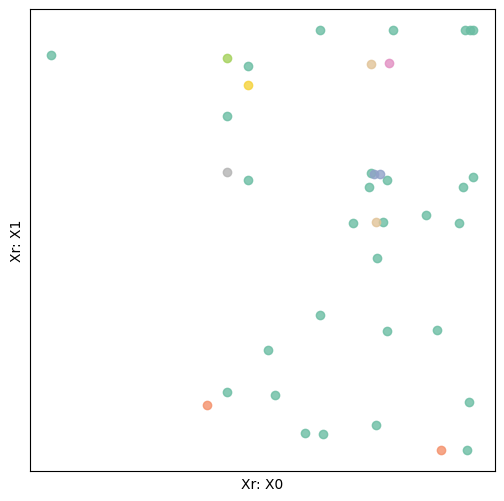

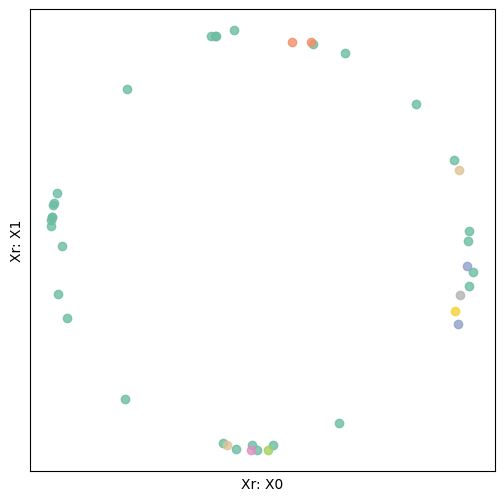

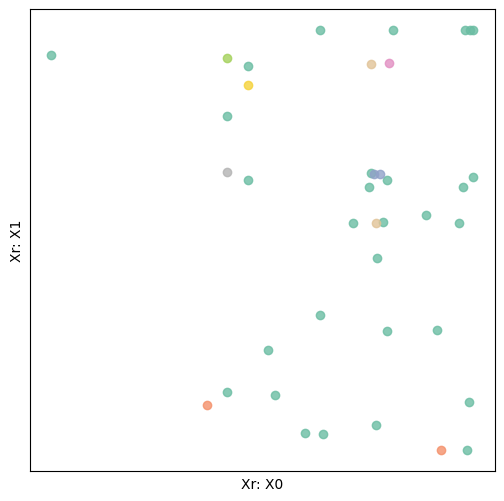

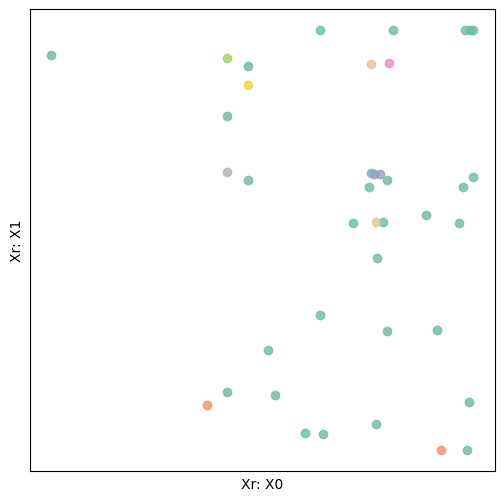

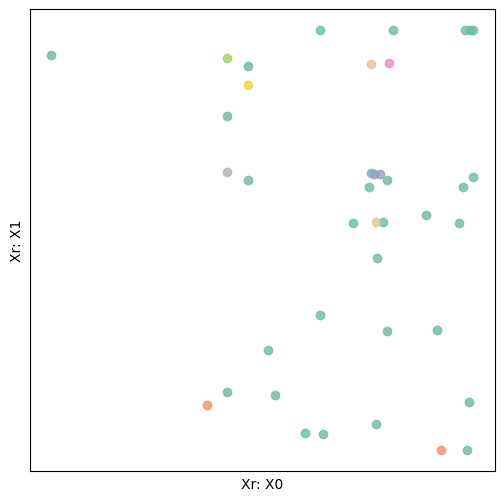

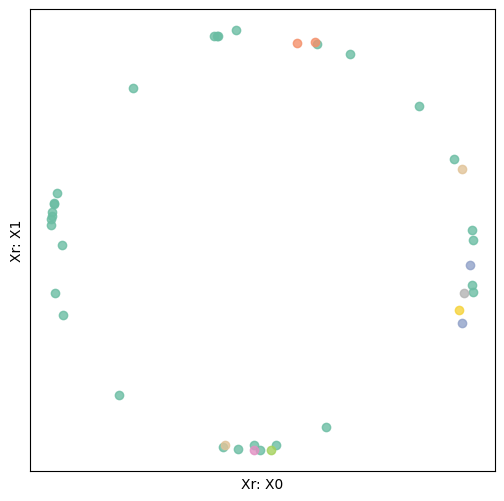

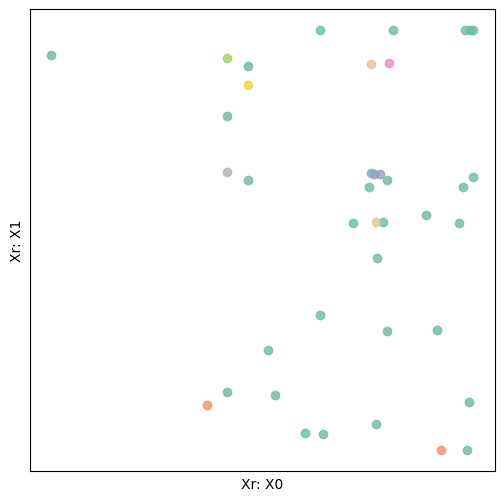

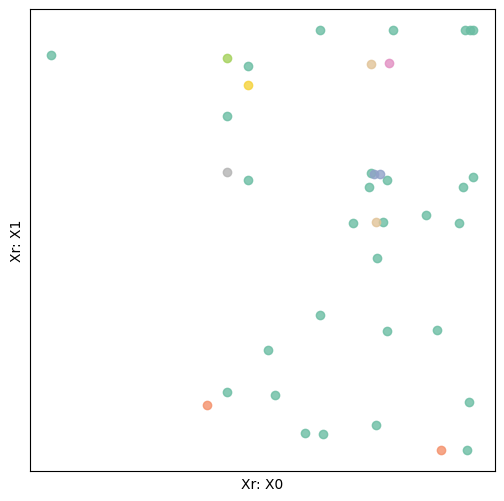

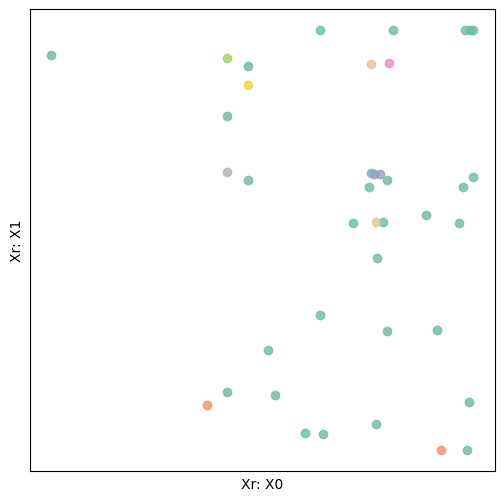

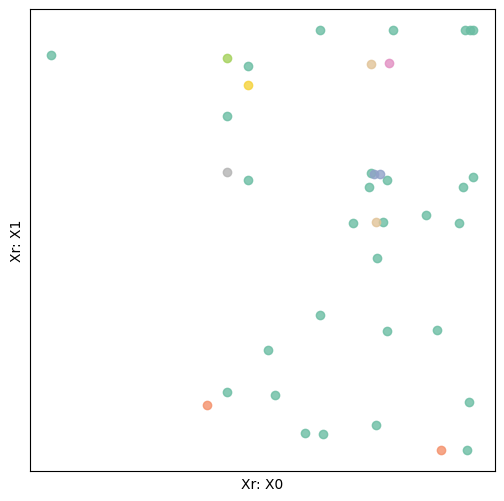

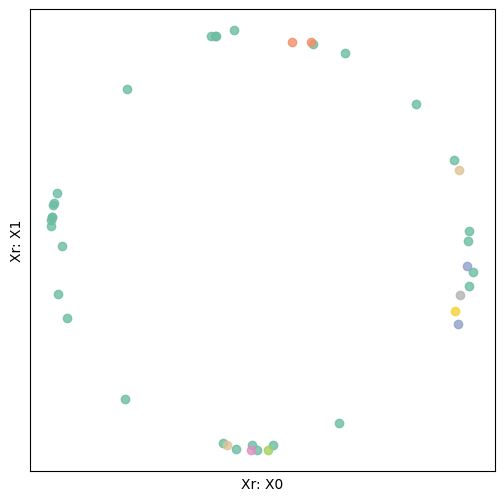

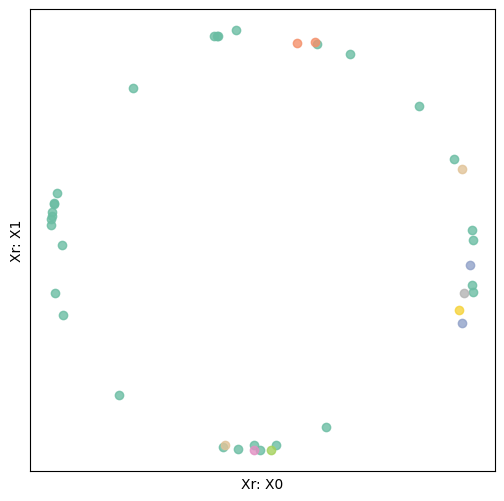

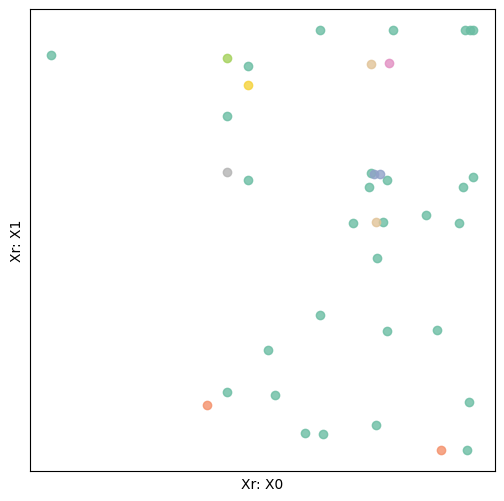

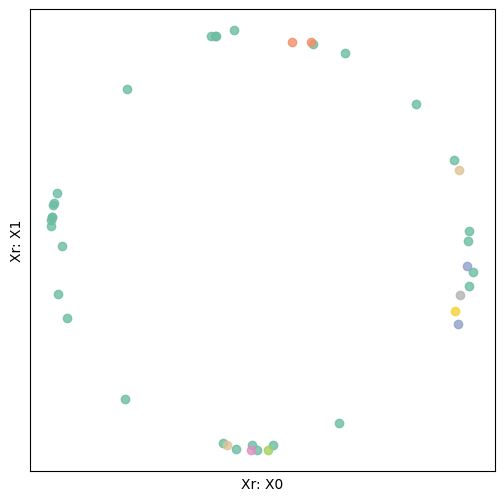

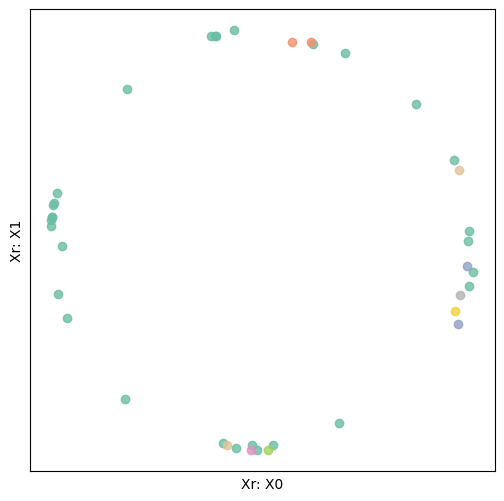

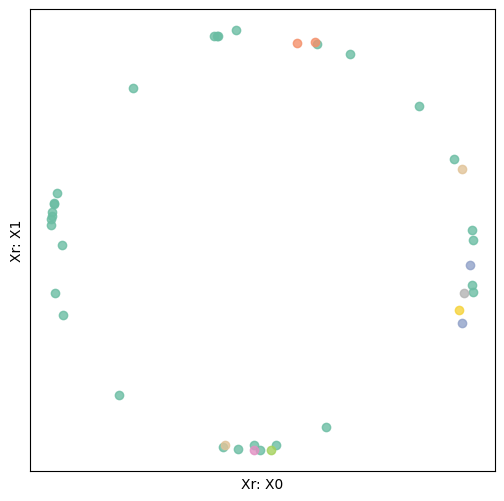

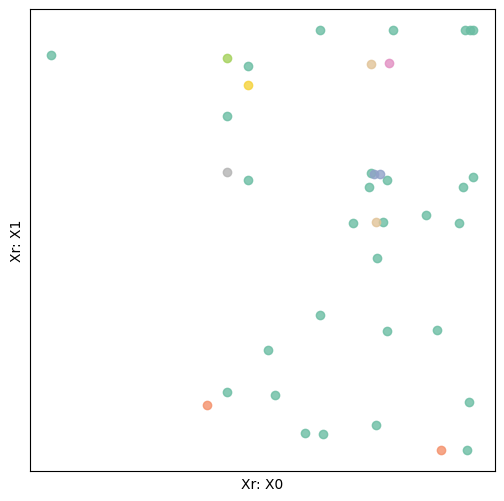

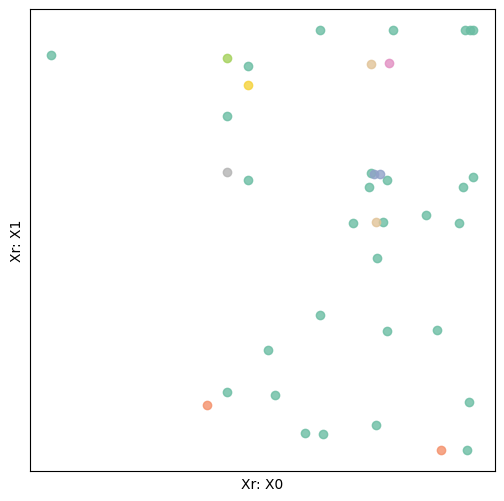

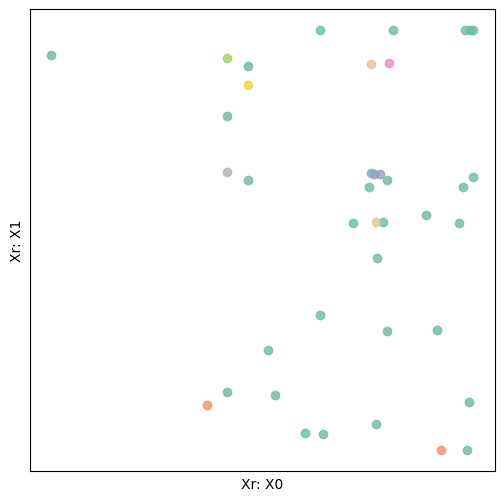

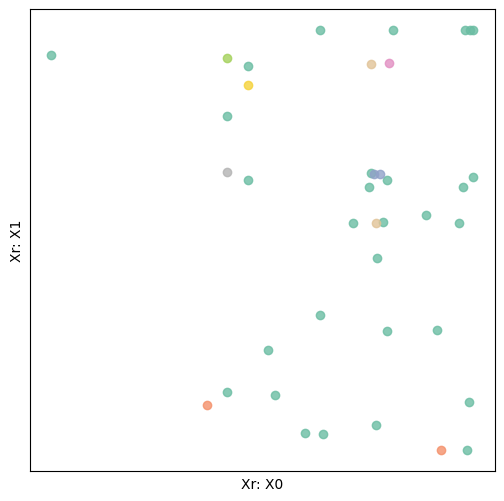

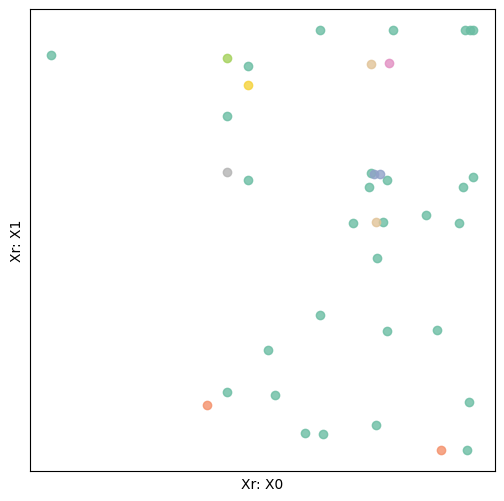

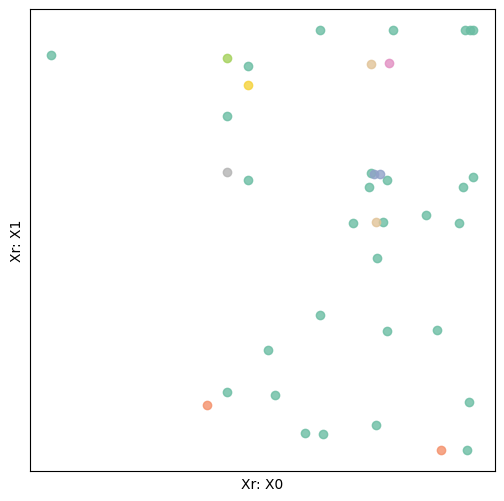

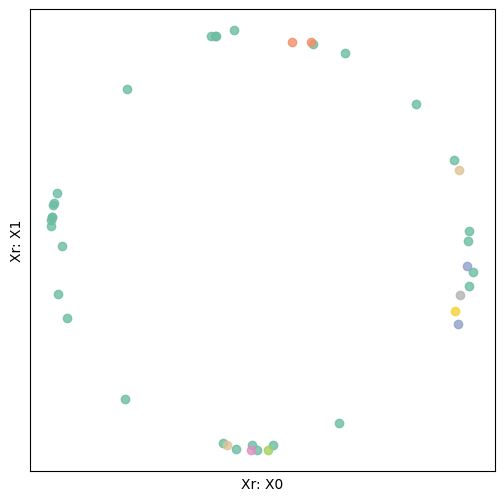

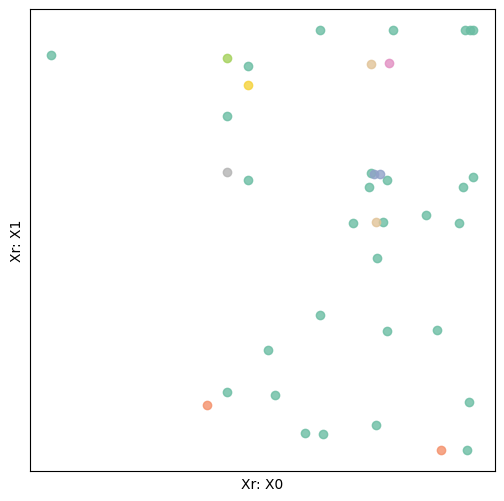

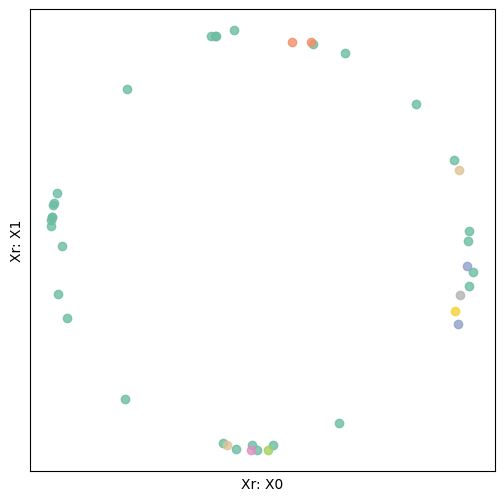

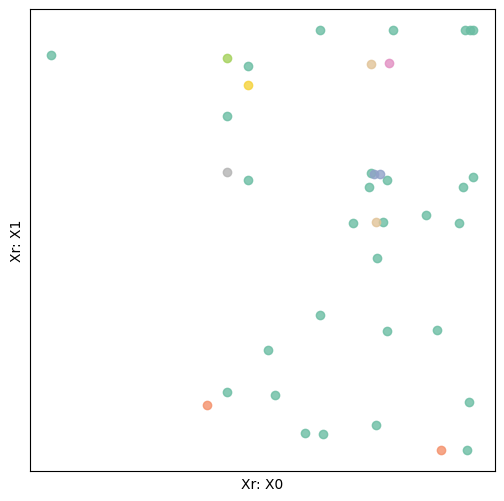

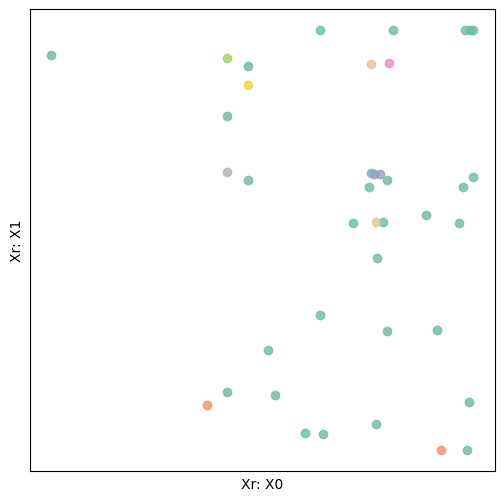

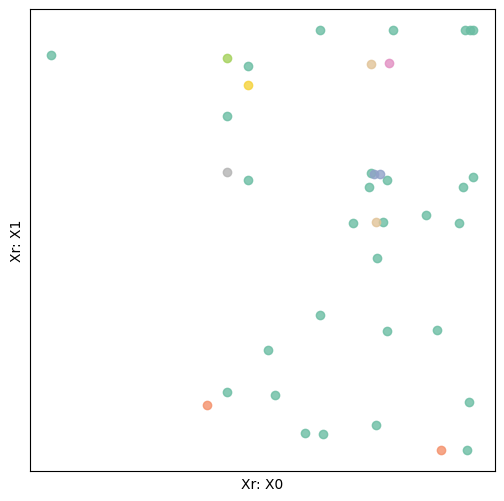

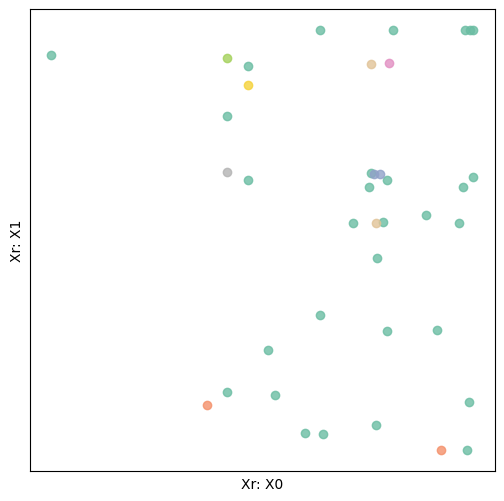

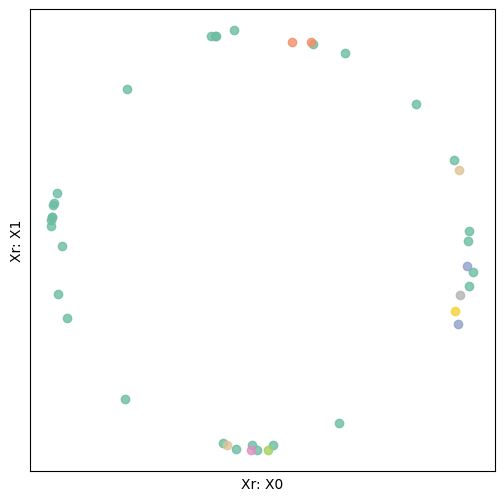

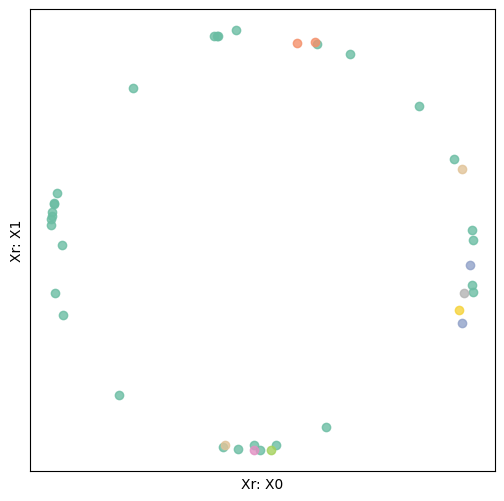

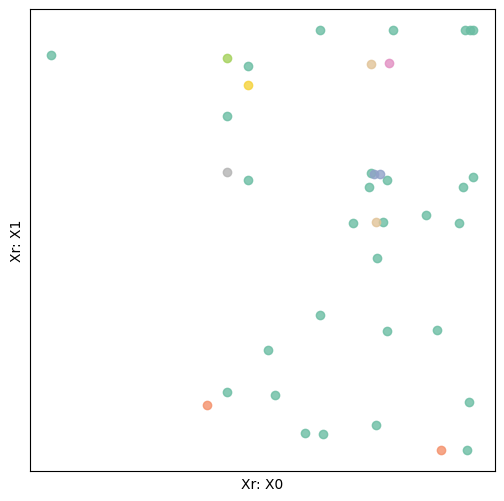

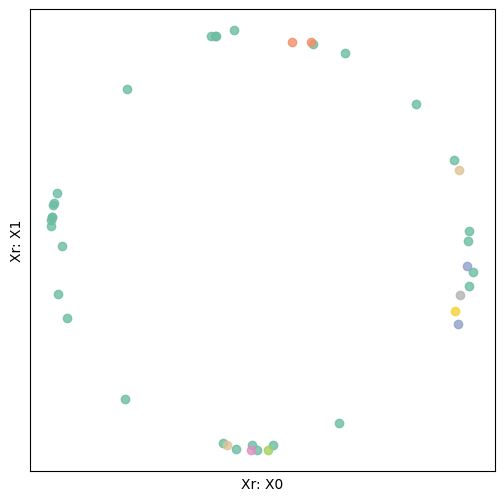

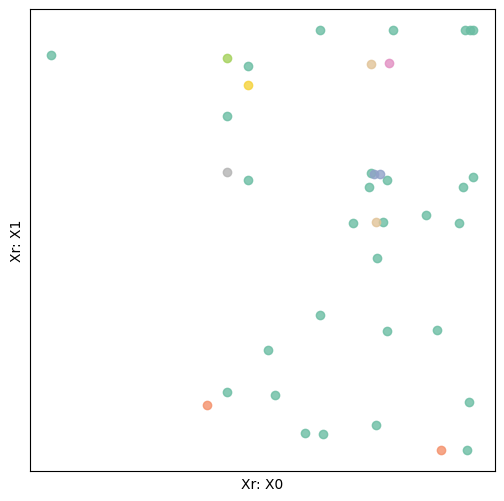

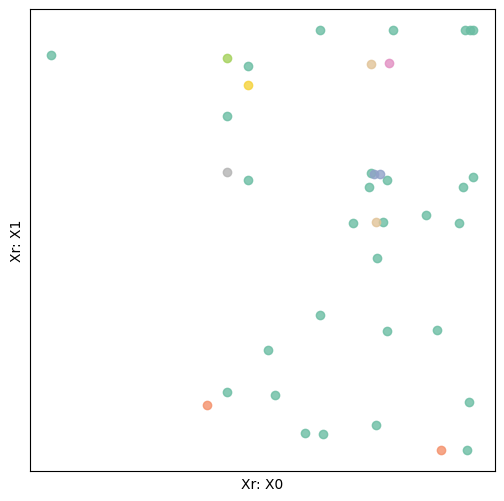

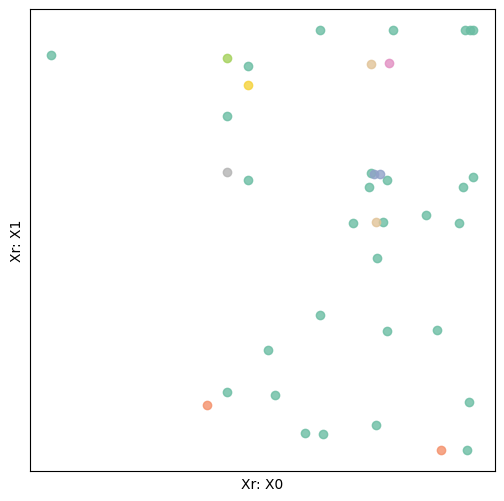

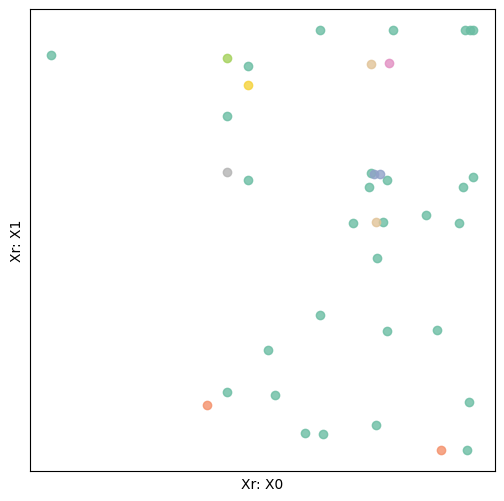

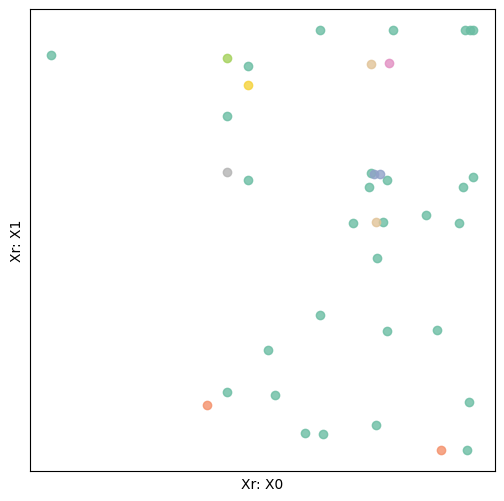

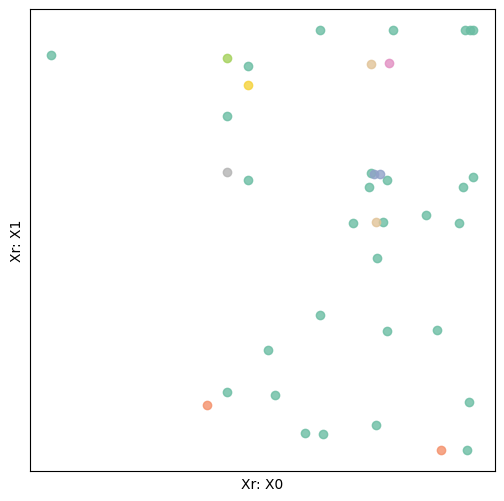

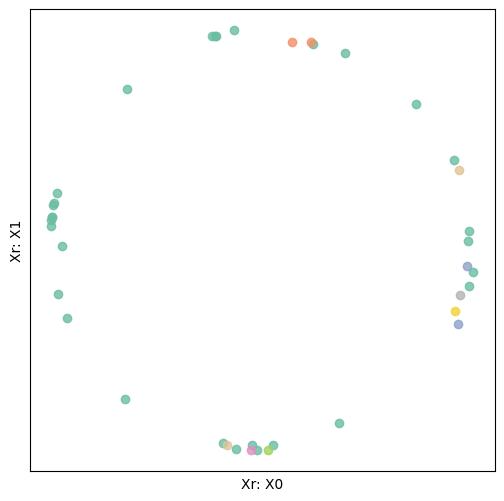

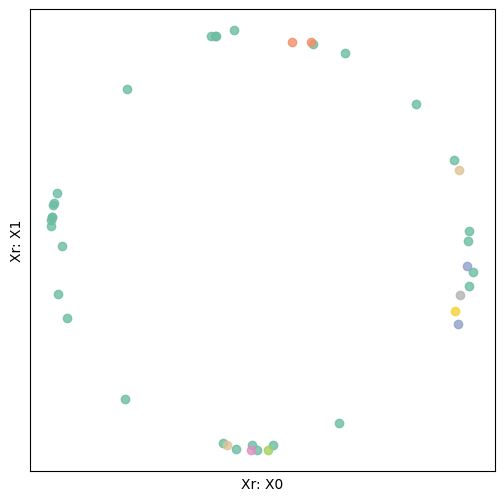

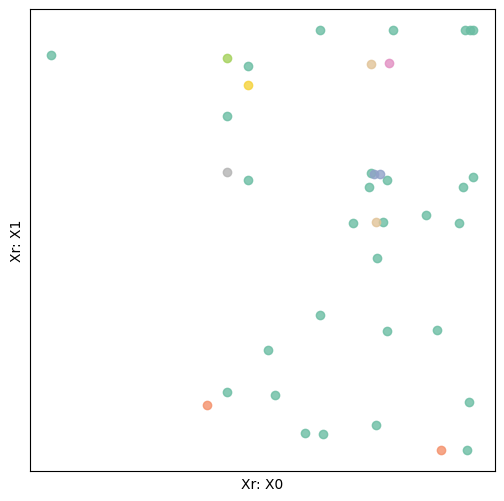

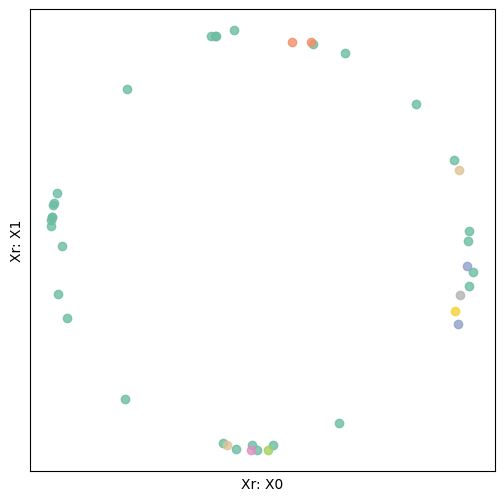

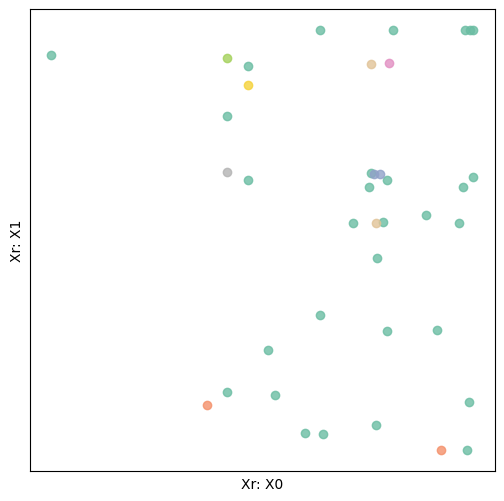

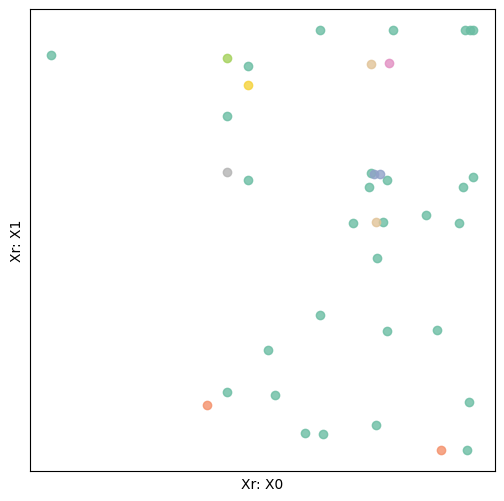

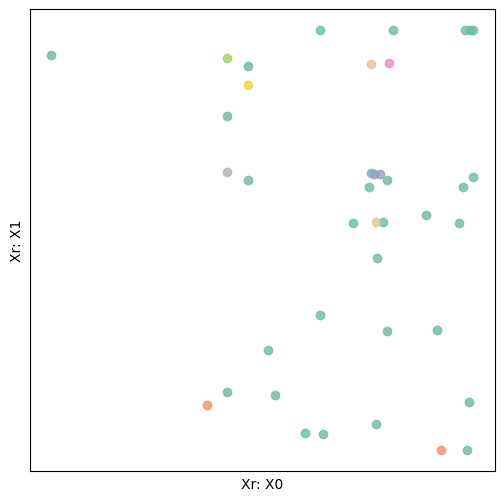

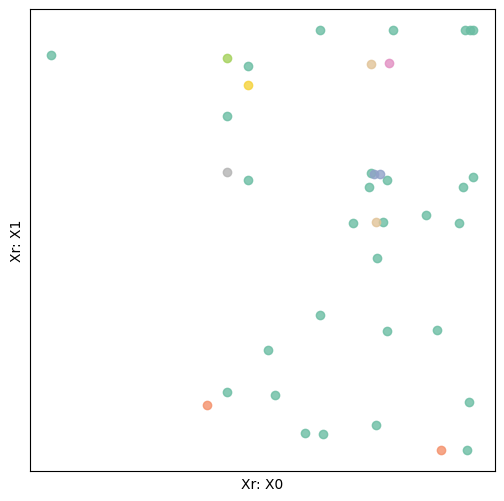

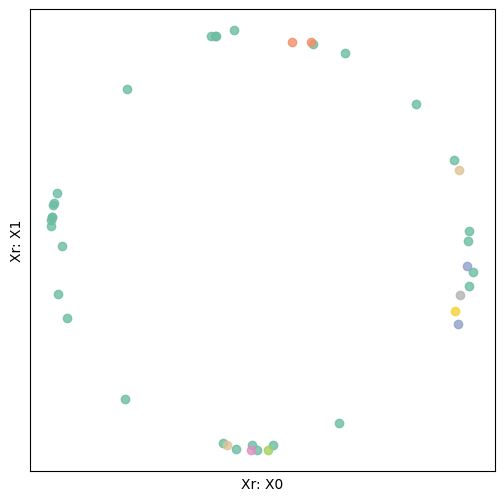

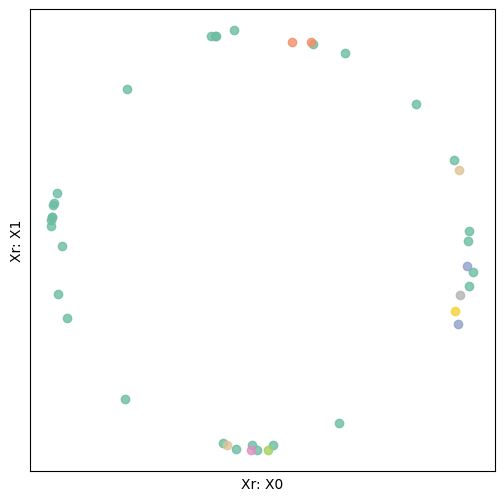

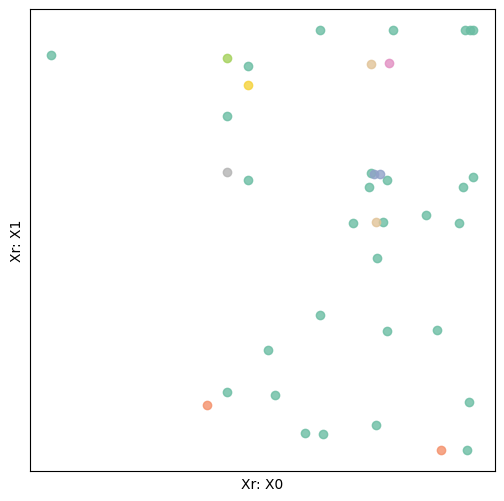

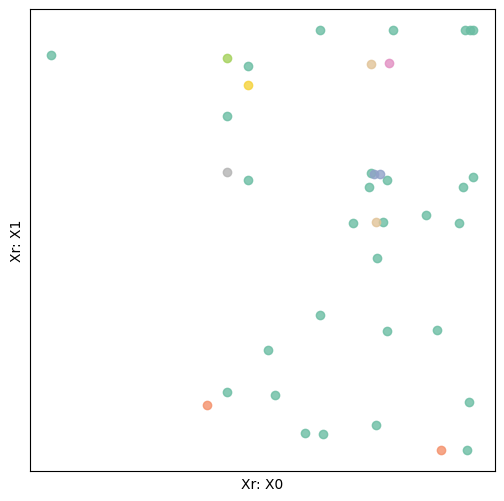

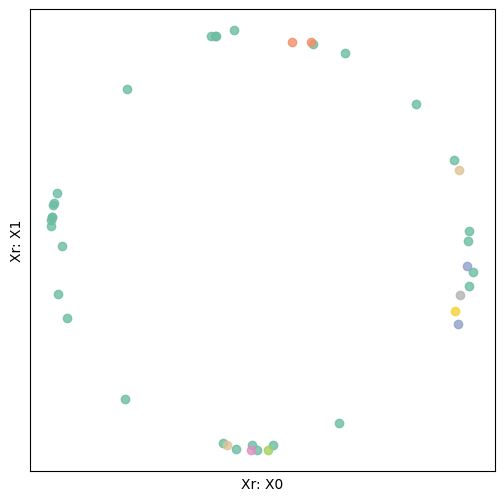

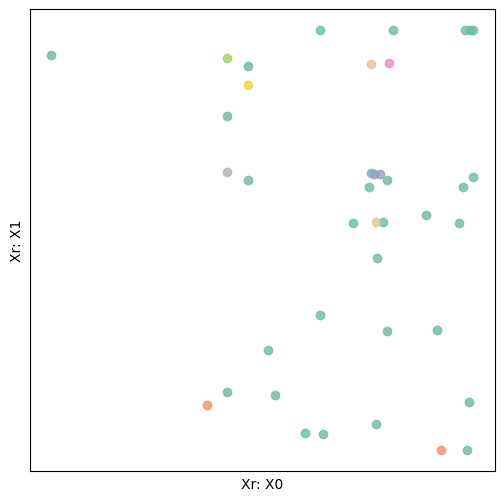

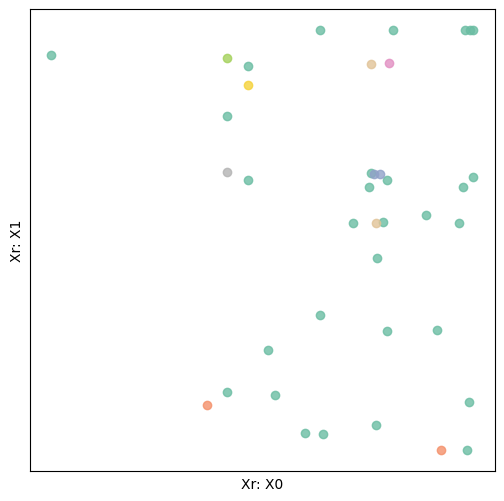

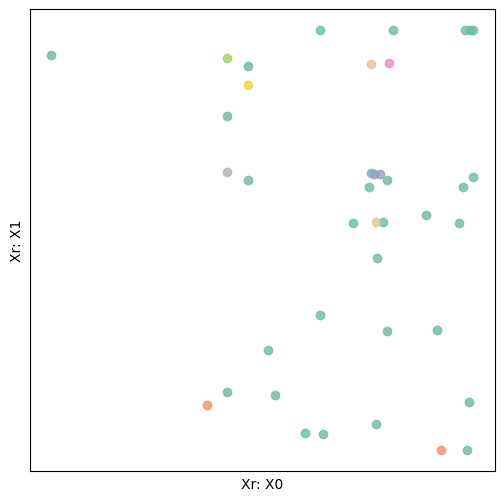

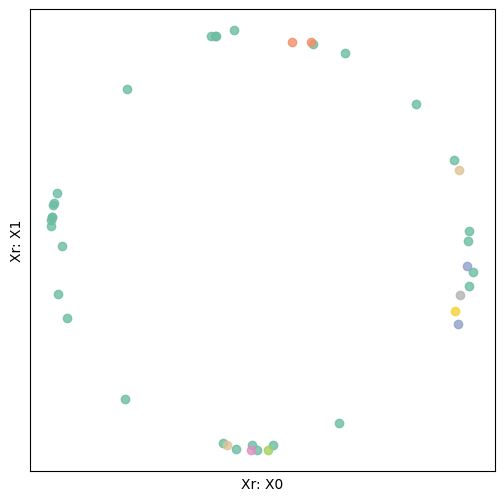

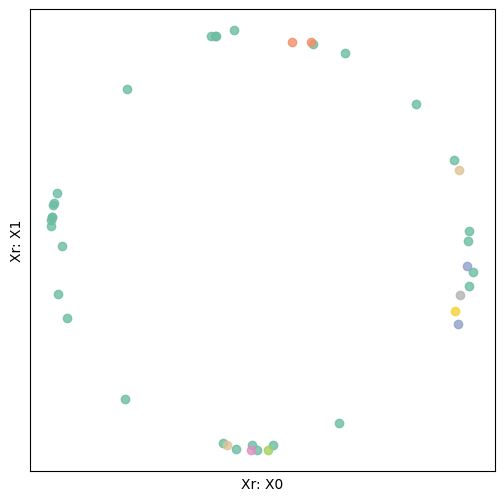

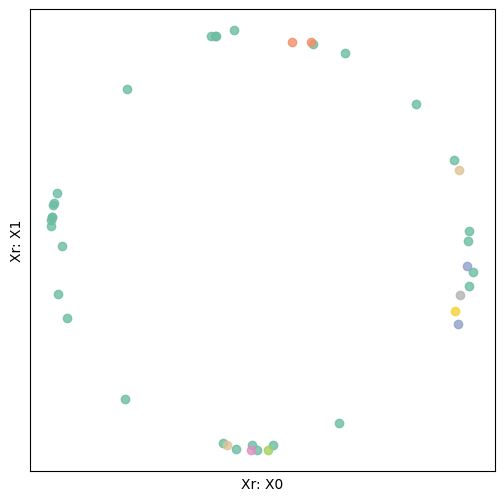

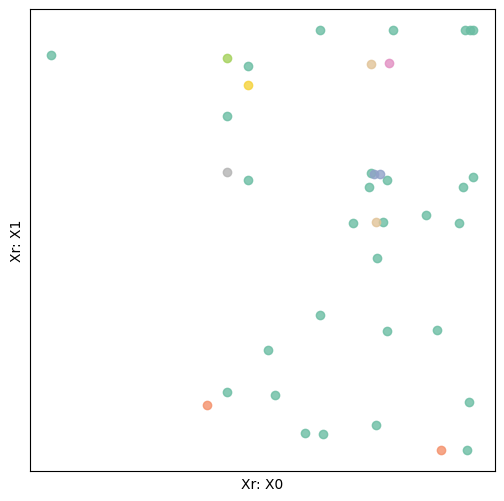

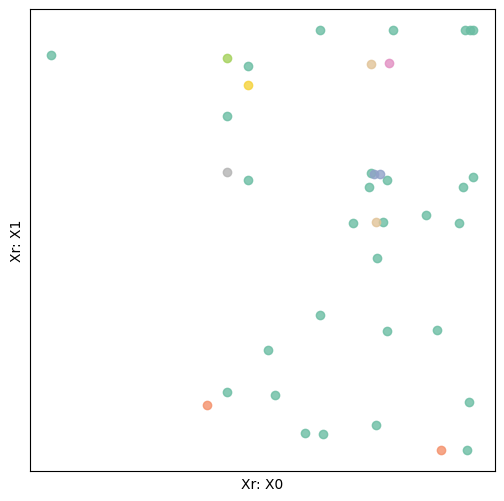

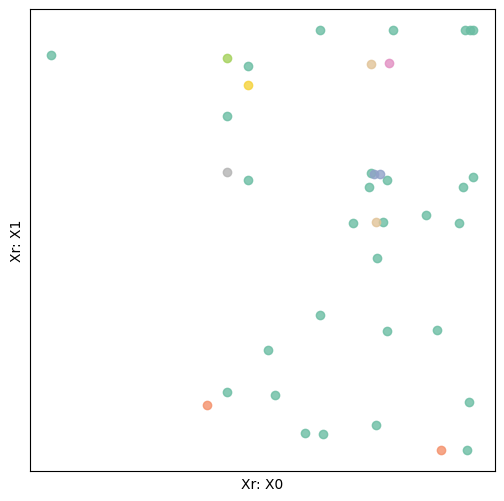

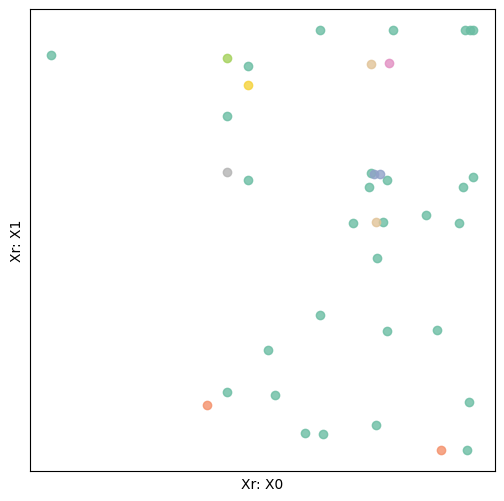

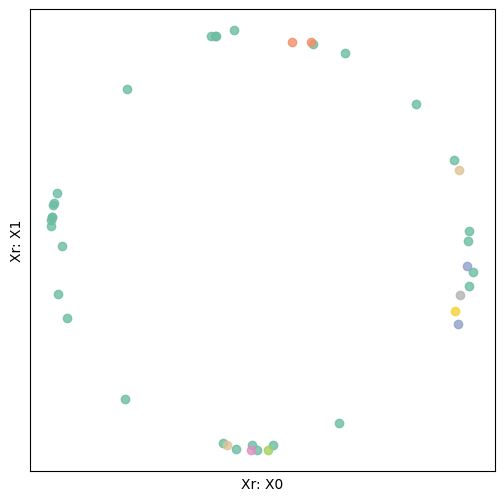

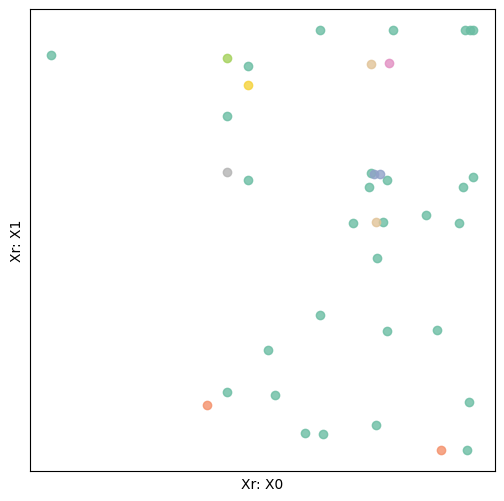

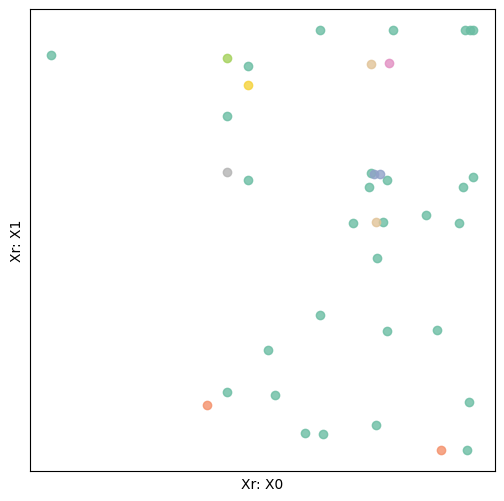

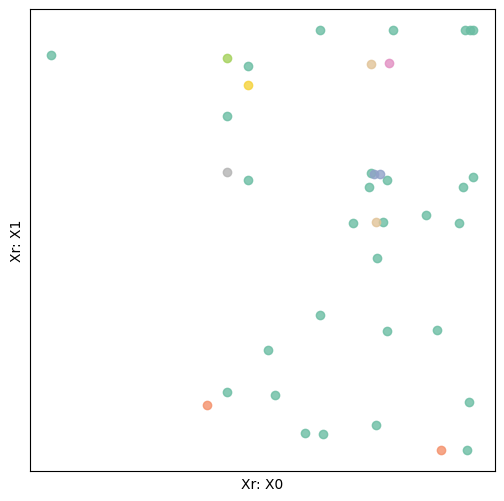

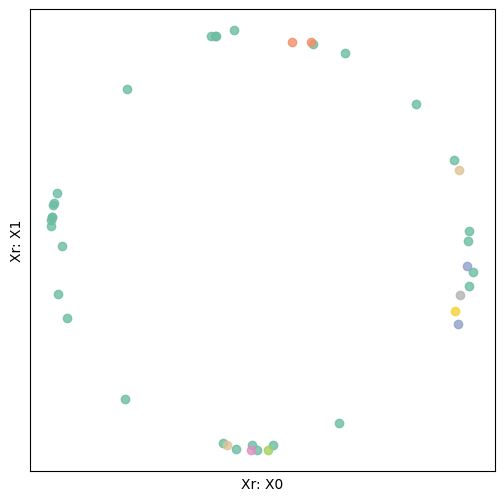

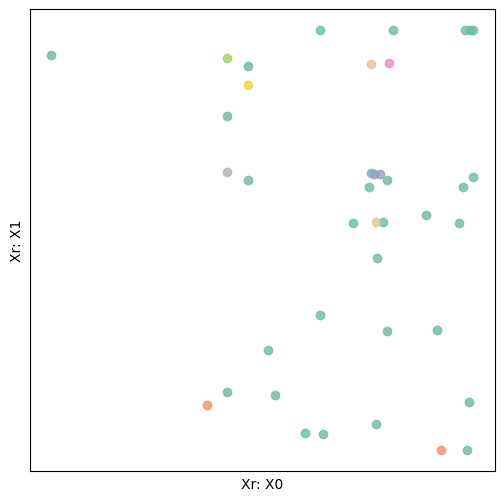

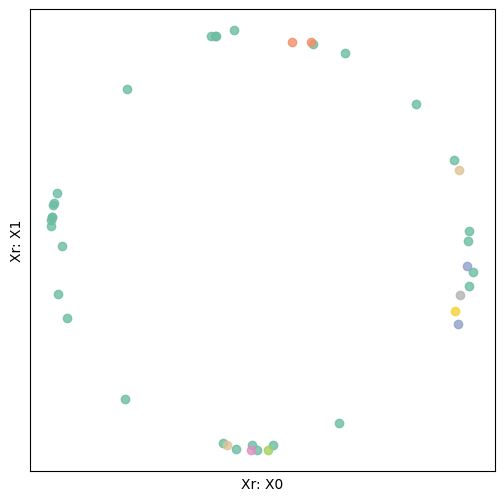

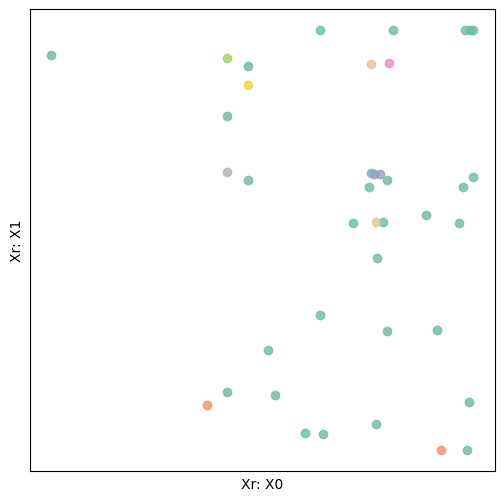

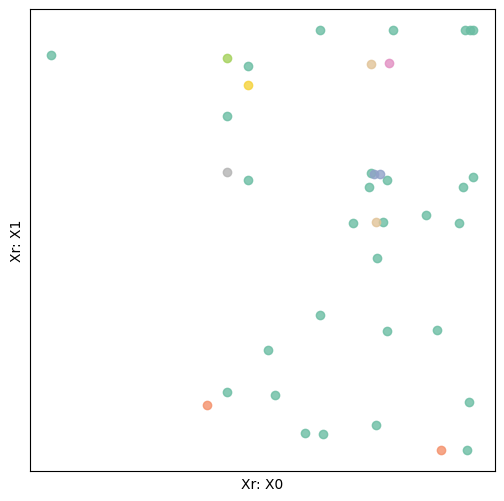

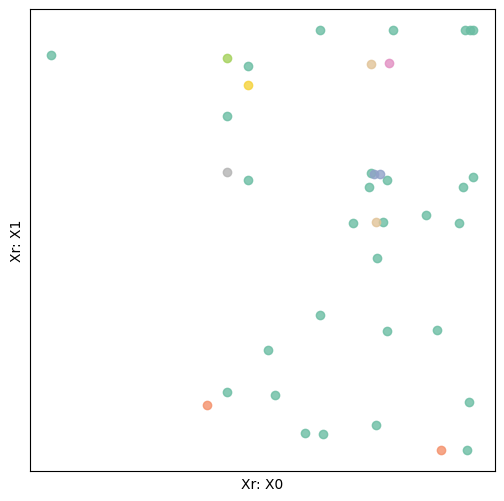

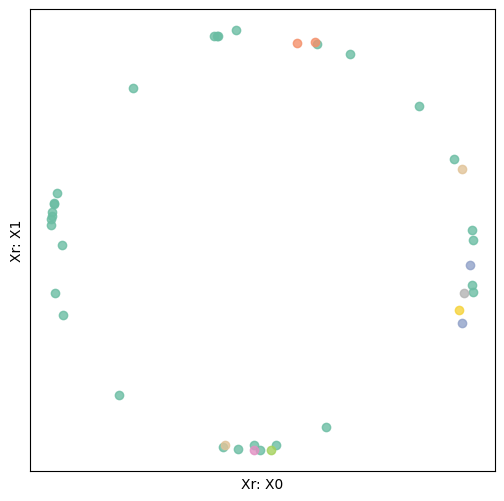

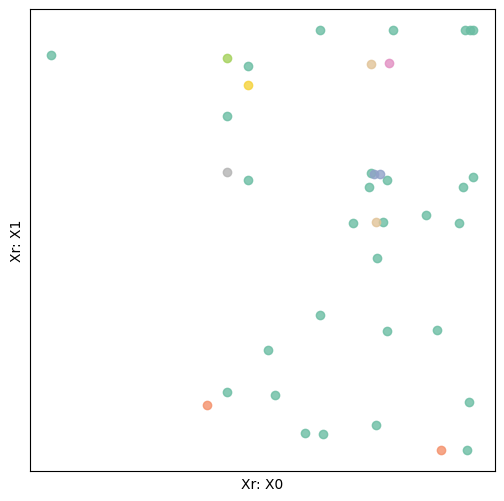

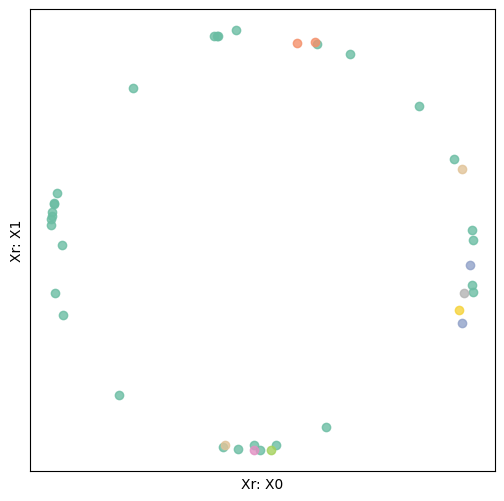

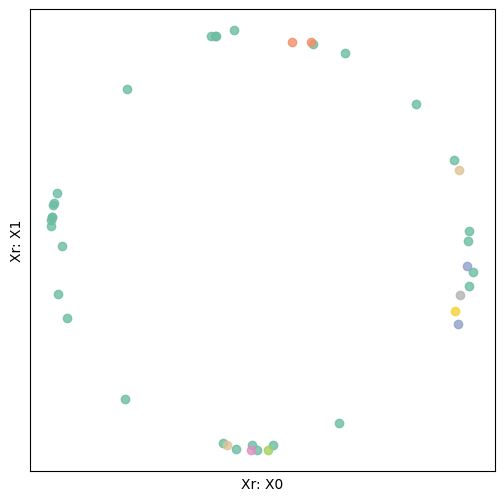

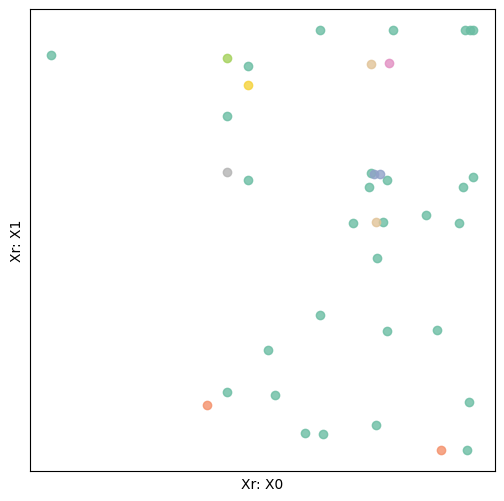

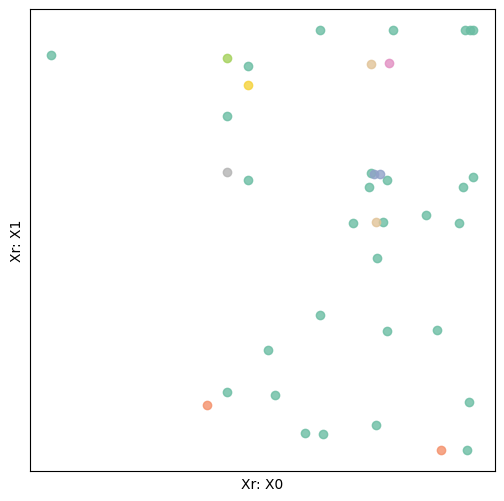

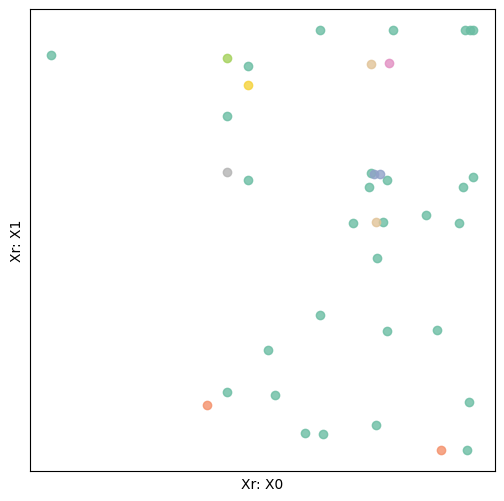

In [23]:
result_cluster_t=cluster_t_iter(
  expr_var_compressed_cp, 
  result_cluster[0][8][1].labels_,
  param_sample_size=100
)

In [4]:
! ls -lh /home/yuninze/res/uiop.zarr && \
  ls -lh /home/yuninze/res/uiop.zarr/result/ && \
  du -hcs /home/yuninze/res/uiop.zarr/*

total 52K
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 19:03 expr
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 14 19:03 ind
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 19:03 name
drwxrwxr-x 6 yuninze yuninze 4.0K 12월 15 06:59 result
total 72K
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 15 06:59 coord_2d
drwxrwxr-x 2 yuninze yuninze  20K 12월 14 23:16 expr_nonconstant
drwxrwxr-x 2 yuninze yuninze  40K 12월 15 02:29 expr_nonconstant_svd
drwxrwxr-x 2 yuninze yuninze 4.0K 12월 15 02:30 pca_coord
1.2G	/home/yuninze/res/uiop.zarr/expr
12K	/home/yuninze/res/uiop.zarr/ind
336M	/home/yuninze/res/uiop.zarr/name
483M	/home/yuninze/res/uiop.zarr/result
2.0G	total
